In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import tweepy

In [2]:
df = pd.read_csv('dataset/all_nodes.csv')
df.head()

,start_node,target_node
0,1026056087596716033,1215592563610009600
1,1026056087596716033,1396392315799805960
2,1026056087596716033,1028327779152973824
3,1026056087596716033,708077628
4,1026056087596716033,495012342


In [3]:
G = nx.from_pandas_edgelist(df,'start_node','target_node')

In [4]:
G.number_of_nodes()

10620

### akun yang diikuti rfrvld dengan pengikut terbanyak

In [5]:
G_sorted=pd.DataFrame(sorted(G.degree, key=lambda x:x[1],reverse=True))
G_sorted.columns=['user_id','degree']
G_sorted.head(10)

,user_id,degree
0,495012342,5001
1,136172717,718
2,288146579,695
3,95639498,644
4,520173410,556
5,107972476,531
6,141945685,483
7,139360100,421
8,1029736502425616385,285
9,126602013,282


### menghapus followe yang tidak terhubung dengan followe dari follower akun rfrvld

In [6]:
 G.remove_edges_from(nx.selfloop_edges(G))

In [42]:
G_tmp = nx.k_core(G,2) #menghapus node yang memiliki edge <  2 
# sehingga follower tertinggi harus memiliki keterikatan terhadap follower rfrvld
G_tmp

### grouping graph using community_louvain

In [43]:
from community import community_louvain

In [44]:
partition=community_louvain.best_partition(G_tmp,resolution=1.0)
# partition
partition

{1215592563610009600: 1,
 1026056087596716033: 4,
 1028327779152973824: 1,
 1172605594793988097: 0,
 1357264945499414532: 3,
 1081747661378613248: 0,
 1263151664061530112: 0,
 1083441997464006656: 0,
 1396392315799805960: 0,
 1351081090304401417: 1,
 1027499959229145089: 0,
 1316408696600031237: 4,
 1029736502425616385: 1,
 306214925: 1,
 1011231629098954766: 1,
 1296073670398377991: 3,
 483588110: 2,
 1271445136812081154: 1,
 293937171: 2,
 3257274392: 0,
 380928027: 1,
 519438367: 1,
 1166320282706968582: 2,
 201263138: 1,
 431226887: 2,
 61949996: 2,
 181874744: 2,
 708077628: 1,
 238577725: 2,
 623552574: 0,
 1155874414572920832: 0,
 1033997408634462208: 0,
 1065895014922772480: 0,
 1233305063562469376: 1,
 1181051338832011264: 4,
 73699406: 2,
 447772754: 2,
 1311027890419458049: 0,
 1108013710881120257: 0,
 292786273: 2,
 225339491: 2,
 215181412: 2,
 589135974: 4,
 95610985: 1,
 1109461100: 1,
 241444973: 1,
 372220015: 1,
 604561520: 0,
 2783438965: 2,
 354642042: 2,
 946650070

In [45]:
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']
partition1

,names,group
0,1215592563610009600,1
1,1026056087596716033,4
2,1028327779152973824,1
3,1172605594793988097,0
4,1357264945499414532,3
...,...,...
627,159086562,2
628,154071010,2
629,275972068,0
630,211079155,2


### TOP 10 influencer di lingkungan social network rafi

In [93]:
G_sorted = pd.DataFrame(sorted(G_tmp.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['names','degree']
G_sorted.head()
data = G_sorted
data.head(10)

,names,degree
0,139360100,273
1,141945685,267
2,520173410,131
3,1029736502425616385,129
4,901998322080129024,96
5,1011231629098954766,90
6,126602013,87
7,1026056087596716033,84
8,95639498,79
9,1028327779152973824,78


### menghitung nilai node strength dengan normalisasi terhadap degree max
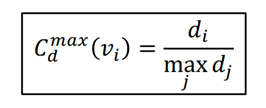
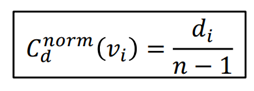

In [97]:
data['strength_fromMaxdegree']=data.apply(lambda x: x['degree']/(data['degree'].max()),axis=1)
data['strength_fromSumOfNodes']=data.apply(lambda x: x['degree']/(data['names'].count()),axis=1)

In [100]:
data.head(10)

,names,degree,strength_fromMaxdegree,strength_fromSumOfNodes
0,139360100,273,1.000000,0.431962
1,141945685,267,0.978022,0.422468
2,520173410,131,0.479853,0.207278
3,1029736502425616385,129,0.472527,0.204114
4,901998322080129024,96,0.351648,0.151899
5,1011231629098954766,90,0.329670,0.142405
6,126602013,87,0.318681,0.137658
7,1026056087596716033,84,0.307692,0.132911
8,95639498,79,0.289377,0.125000
9,1028327779152973824,78,0.285714,0.123418


### mengambil nama user sesuai 10 id dengan pengaruh terbesar

In [53]:
api_key="8l2DdNdbuQm7EIYgPosHtbdz7"
api_secret_key="nNlUcjvtjQnQinlbvyI2UDusWR3IrN207G91IqkdnuQRTm9AYi"
access_token="1405150674-mxHQZIpivG72aIcEtyg7YrSPbHUwiuCwDzr1ZHx"
access_token_secret="t3mPansviaxcBilV5ULeGrBIiqxWzPqPPDIkfgeVPBhqh"

In [54]:
try:
    auth=tweepy.OAuthHandler(api_key,api_secret_key) #set untuk mendapatkan authority
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True) #mengambil API
except BaseException as e:
    print("failed "+e)

In [69]:
user_name=[]
for i, user__id in enumerate(data['names']):
#     print(user__id)
    user__name=api.get_user(user_id=user__id)
    user_name.append(user__name.screen_name)
    if (i+1)>9:
        break
user_name

['chandradn',
 'bgskrb',
 'jnthnhrynt',
 'nabilamsa',
 'FadhilKusuma1',
 'therealmrdm',
 'erondardak',
 'rfrvld',
 'nasyaul',
 'CapariJanuario']

In [101]:
top_10=data.copy()
top_10=top_10.iloc[0:10]
top_10=top_10.rename(columns={"names":"user_id"})
top_10['name']=user_name
top_10=pd.DataFrame(top_10,columns=['name','user_id','degree'
                                    ,'strength_fromMaxdegree'
                                    ,'strength_fromSumOfNodes'])
top_10

,name,user_id,degree,strength_fromMaxdegree,strength_fromSumOfNodes
0,chandradn,139360100,273,1.000000,0.431962
1,bgskrb,141945685,267,0.978022,0.422468
2,jnthnhrynt,520173410,131,0.479853,0.207278
3,nabilamsa,1029736502425616385,129,0.472527,0.204114
4,FadhilKusuma1,901998322080129024,96,0.351648,0.151899
5,therealmrdm,1011231629098954766,90,0.329670,0.142405
6,erondardak,126602013,87,0.318681,0.137658
7,rfrvld,1026056087596716033,84,0.307692,0.132911
8,nasyaul,95639498,79,0.289377,0.125000
9,CapariJanuario,1028327779152973824,78,0.285714,0.123418


### Visualisasi Data

In [47]:
combined = pd.merge(data,partition1, how='left', left_on="names",right_on="names")

In [48]:
combined.head()

,names,degree,group
0,139360100,273,2
1,141945685,267,2
2,520173410,131,1
3,1029736502425616385,129,1
4,901998322080129024,96,1


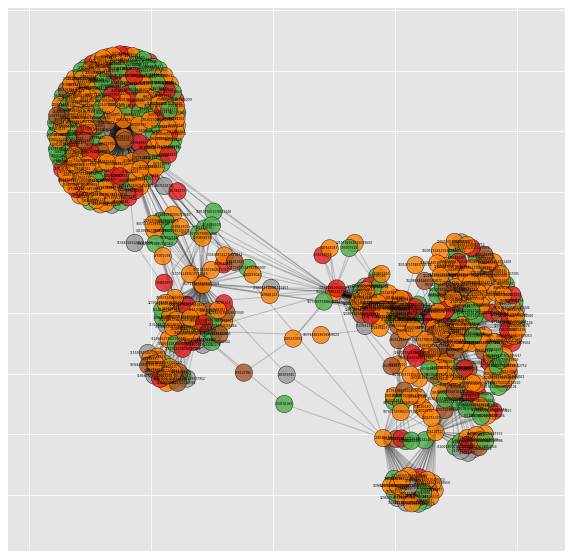

In [65]:
pos = nx.spring_layout(G_tmp)
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')

nodes = nx.draw_networkx_nodes(G_tmp, pos,
                               cmap=plt.cm.Set1,
                               node_color=combined['group'],
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G_tmp, pos, font_size=3)
nx.draw_networkx_edges(G_tmp, pos, width=1.0, alpha=0.2)
plt.savefig('twitterFollowers.png')

In [66]:
combined = combined.rename(columns={"names": "Id"}) 
edges = nx.to_pandas_edgelist(G_tmp)
nodes = combined['Id']
edges.to_csv("edges.csv")
combined.to_csv("nodes.csv")